## Homework 3 - Vincent Dufour

### Task 1: Data Exploration

- Import data
- Display first five rows of data
- Print the summary statistics (mean, median, mode) for the numeric columns

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv("StudentsPerformance.csv")

print("First Five Rows:\n")
print(data.head(5), "\n")
print("-----------------------------------------------\n")

# Math score summary statistics
print('Min, Mean, Median, and Max of "Math Score":')
print('Min:', data['math score'].min())
print('Mean:', data['math score'].mean())
print('Median:', data['math score'].median())
print('Max:', data['math score'].max())

# Reading score summary statistics
print('\nMin, Mean, Median, and Max of "Reading Score":')
print('Min:', data['reading score'].min())
print('Mean:', data['reading score'].mean())
print('Median:', data['reading score'].median())
print('Max:', data['reading score'].max())

# Writing score summary statistics
print('\nMin, Mean, Median, and Max of "Writing Score":')
print('Min:', data['writing score'].min())
print('Mean:', data['writing score'].mean())
print('Median:', data['writing score'].median())
print('Max:', data['writing score'].max())

First Five Rows:

   Student ID  gender race/ethnicity parental level of education  \
0           1  female        group A           bachelor's degree   
1           2    male        group B                some college   
2           3  female        group C             master's degree   
3           4    male        group D          associate's degree   
4           5  female        group E                 high school   

          lunch test preparation course  math score  reading score  \
0      standard                    none          73             92   
1  free/reduced               completed          68             99   
2      standard                    none          97             95   
3  free/reduced               completed          71             49   
4      standard                    none          68             92   

   writing score  
0             63  
1             95  
2             90  
3             52  
4             75   

------------------------------------

### Task 2: Visualizations
- Bar plot
- Histogram
- Boxplot
- Scatterplot
- Pie chart

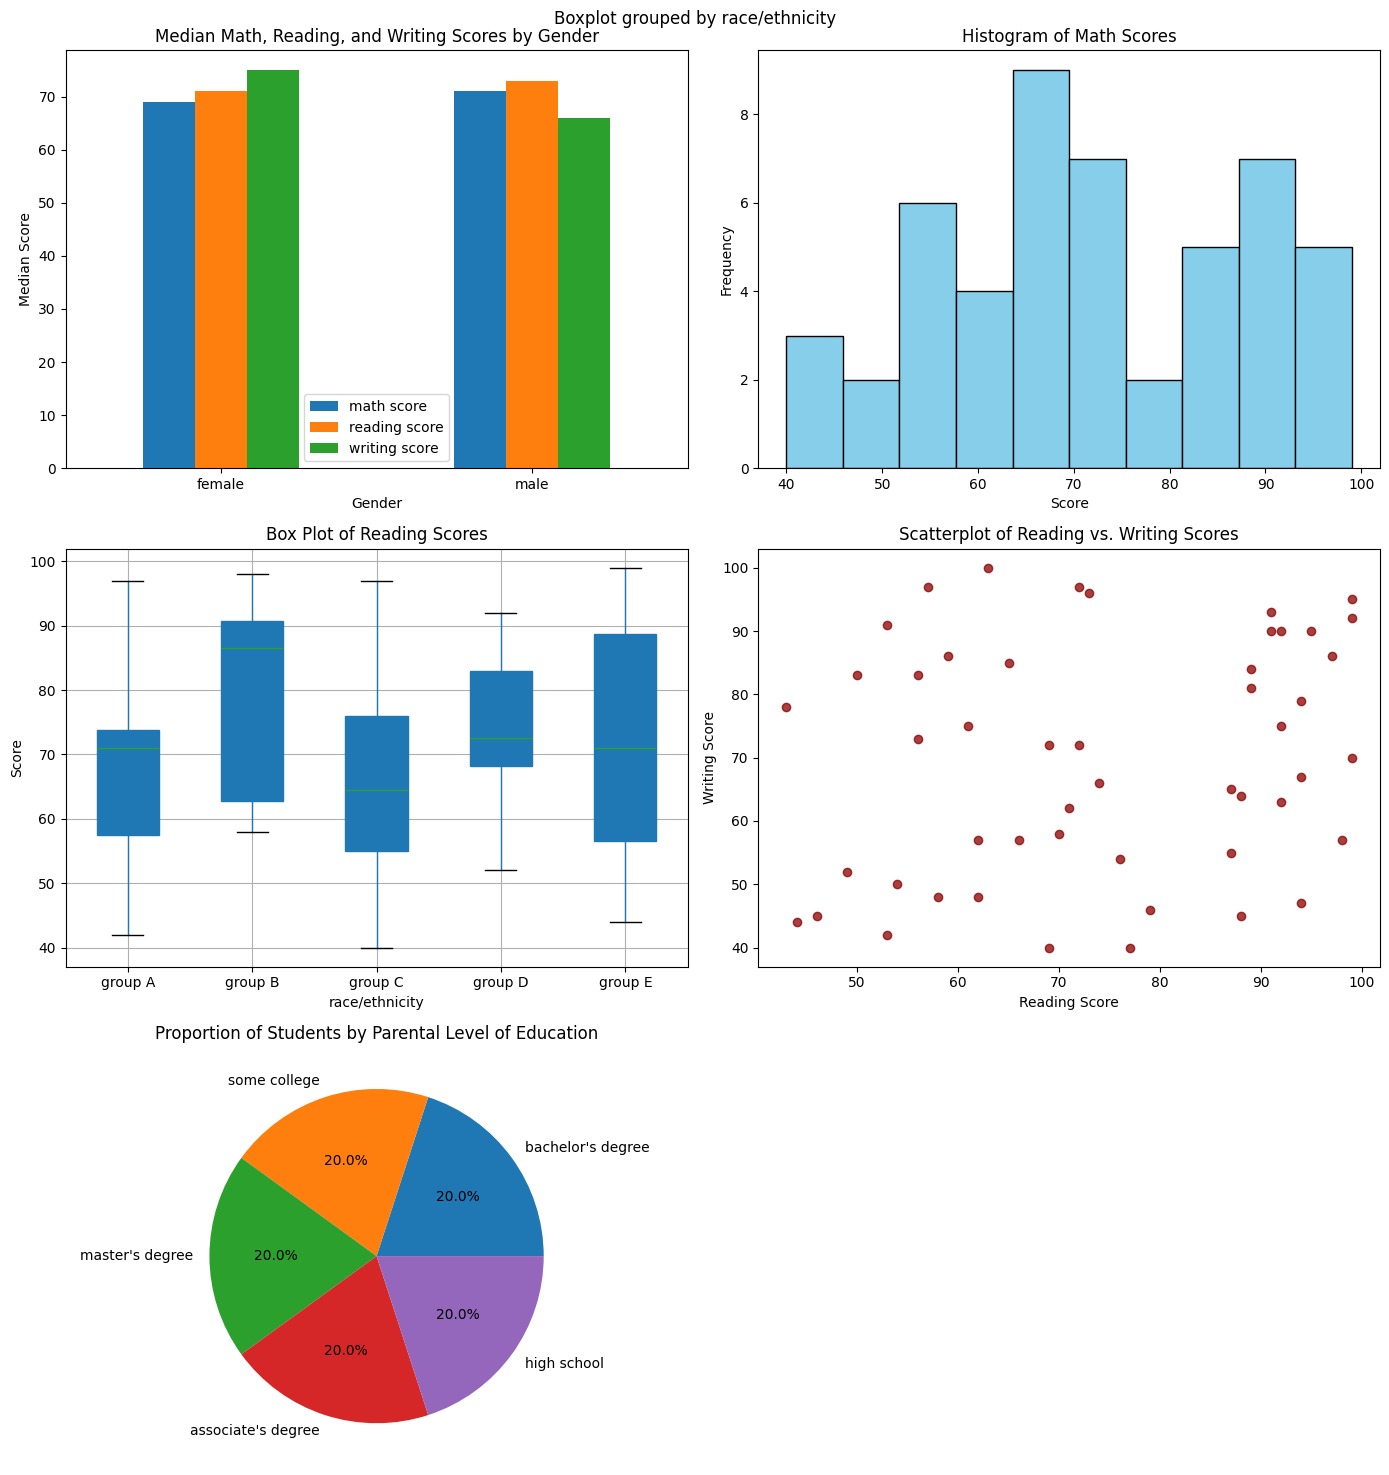

In [23]:
# converting to numeric
data['math score'] = pd.to_numeric(data['math score'], errors='coerce')
data['reading score'] = pd.to_numeric(data['reading score'], errors='coerce')
data['writing score'] = pd.to_numeric(data['writing score'], errors='coerce')

# preparing data for visualizations
bar_chart = data[['gender', 'math score', 'reading score', 'writing score']]
box_plot = data[['race/ethnicity', 'math score']]
grouped_data_bar = bar_chart.groupby('gender').median()

# setting subplot dimensions
fig, axs = plt.subplots(3, 2, figsize=(14, 15))

# bar chart of average math, reading, and writing scores
grouped_data_bar.plot(kind="bar", ax=axs[0, 0], rot=0)
axs[0, 0].set_title('Median Math, Reading, and Writing Scores by Gender')
axs[0, 0].set_xlabel('Gender')
axs[0, 0].set_ylabel('Median Score')

# histogram of math scores
axs[0, 1].hist(data['math score'].dropna(), bins=10, color='skyblue', edgecolor='black')
axs[0, 1].set_title('Histogram of Math Scores')
axs[0, 1].set_xlabel('Score')
axs[0, 1].set_ylabel('Frequency')

# boxplot of math scores across races
box_plot.boxplot(column='math score', by='race/ethnicity', patch_artist=True, ax=axs[1, 0])
axs[1, 0].set_title('Box Plot of Reading Scores')
axs[1, 0].set_ylabel('Score')

# scatterplot of reading score and writing score
axs[1, 1].scatter(data['reading score'], data['writing score'], color='darkred', alpha=0.75)
axs[1, 1].set_title('Scatterplot of Reading vs. Writing Scores')
axs[1, 1].set_xlabel('Reading Score')
axs[1, 1].set_ylabel('Writing Score')

# pie chart showing proportion of students based on parental level of education
parent_education_count = data['parental level of education'].value_counts()
axs[2, 0].pie(parent_education_count, labels=parent_education_count.index, autopct='%1.1f%%')
axs[2, 0].set_title('Proportion of Students by Parental Level of Education')

# remove last graph
fig.delaxes(axs[2, 1])

# adjust then show plots
plt.tight_layout()
plt.show()

### Task 3: Insights and Conclusion

Over the median scores for math, reading, and writing, female students scored much better than male students for writing, then scored only a little worse for both math and reading. The histogram of math scores across all students shows two modes, the first on the higher end between the 60-70 interval, and the second right on the 90 interval point. The boxplot graph shows group B is the highest scoring group, group D has the tighest scores (least spread out), and group E is the loosest (most spread out). The scatterplot of reading vs. writing scores is undecisive, there's a lot of spread between scores. There may be a slight clump when both reading and writing scores are high, but otherwise no trends are noticeable. Lastly the pie chart shows a perfectly equal distribution for the proportion of students by parental level of education.